In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import statsmodels.api as sm

In [2]:
df = pd.read_csv("AC_Data.csv")
pd.set_option("display.max_columns",200)
df.head()

,0,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
1,2019-08-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
3,2019-08-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87840 entries, 0 to 87839
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       87840 non-null  object 
 1   AC 1    43708 non-null  float64
 2   AC 2    43711 non-null  float64
 3   AC 3    43713 non-null  float64
 4   AC 4    43704 non-null  float64
 5   AC 5    43716 non-null  float64
 6   AC 6    43717 non-null  float64
 7   AC 7    43679 non-null  float64
 8   AC 8    43704 non-null  float64
 9   AC 9    43654 non-null  float64
 10  AC 10   43690 non-null  float64
 11  AC 11   43670 non-null  float64
 12  AC 12   43713 non-null  float64
 13  AC 13   43719 non-null  float64
 14  AC 14   43696 non-null  float64
 15  AC 15   43715 non-null  float64
 16  AC 16   43710 non-null  float64
 17  AC 17   43714 non-null  float64
 18  AC 18   43723 non-null  float64
dtypes: float64(18), object(1)
memory usage: 12.7+ MB


In [4]:
df.loc[df["0"]=="2019-08-18 00:02:00"]

,0,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
24482,2019-08-18 00:02:00,NaN,NaN,NaN,NaN,NaN,NaN,4.131462,NaN,6.595615,NaN,2.153929,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
import datetime as dt

In [6]:
df1 = df.copy()

In [7]:
df1.rename(columns = {"0":"Date"},inplace = True)

In [8]:
df1.head()

,Date,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,2019-08-01 00:00:00,7.518632,8.788315,0.0,0.0,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
1,2019-08-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-08-01 00:02:00,7.426114,8.940615,0.0,0.0,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
3,2019-08-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-08-01 00:04:00,7.052986,9.161103,0.0,0.0,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475


In [9]:
df1.head(100)

,Date,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
0,2019-08-01 00:00:00,7.518632,8.788315,0.000000,0.000000,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
1,2019-08-01 00:01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-08-01 00:02:00,7.426114,8.940615,0.000000,0.000000,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
3,2019-08-01 00:03:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-08-01 00:04:00,7.052986,9.161103,0.000000,0.000000,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2019-08-01 01:35:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,2019-08-01 01:36:00,6.953291,9.149169,0.993959,3.256623,2.378692,4.496755,2.234798,4.529074,2.172027,3.294929,2.376283,5.968679,4.328453,5.665541,5.669294,4.631608,2.311446,4.016314
97,2019-08-01 01:37:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,2019-08-01 01:38:00,6.942259,9.154129,0.999768,2.878759,2.305204,4.063026,2.611600,4.507754,2.324301,3.396650,1.934941,1.960779,4.374886,5.658740,5.791497,4.613042,2.324040,4.030399


In [10]:
# It seems that the data is recorded after every one minute. so it is better to remove all the Nan values.
df1.dropna(inplace= True)


In [11]:
# fixing the datatype of datetime attribute:
df1["Date"] = pd.to_datetime(df1["Date"])

df1["Month"] =df1["Date"].dt.month
df1["Weekday"] = df1["Date"].dt.weekday
df1["Day"] = df1["Date"].dt.day

In [12]:
df2 = round(df1.groupby(["Date","Month","Day"],as_index = False).sum(),2)
df2["Date"] = df2["Date"].dt.date

In [13]:
df2["Weekday"].value_counts()
def weekday_map (x):
    return x.map({0:"Mon",1:"Tue",2:"Wed",3:"Thu",4:"Fri",5:"Sat",6:"Sun"})
df2[["Weekday"]] = df2[["Weekday"]].apply(weekday_map)

In [14]:
daily_AC_Usage = df2.groupby(["Date","Month","Day","Weekday"],as_index=False).sum()

In [15]:
daily_AC_Usage
daily_AC_Usage["Total_Consumption"] = daily_AC_Usage.iloc[:,4:-1].sum(axis = 1)
#This is the final dataframe that we will work with. The dataset has the daily power consumption details for all the acs.

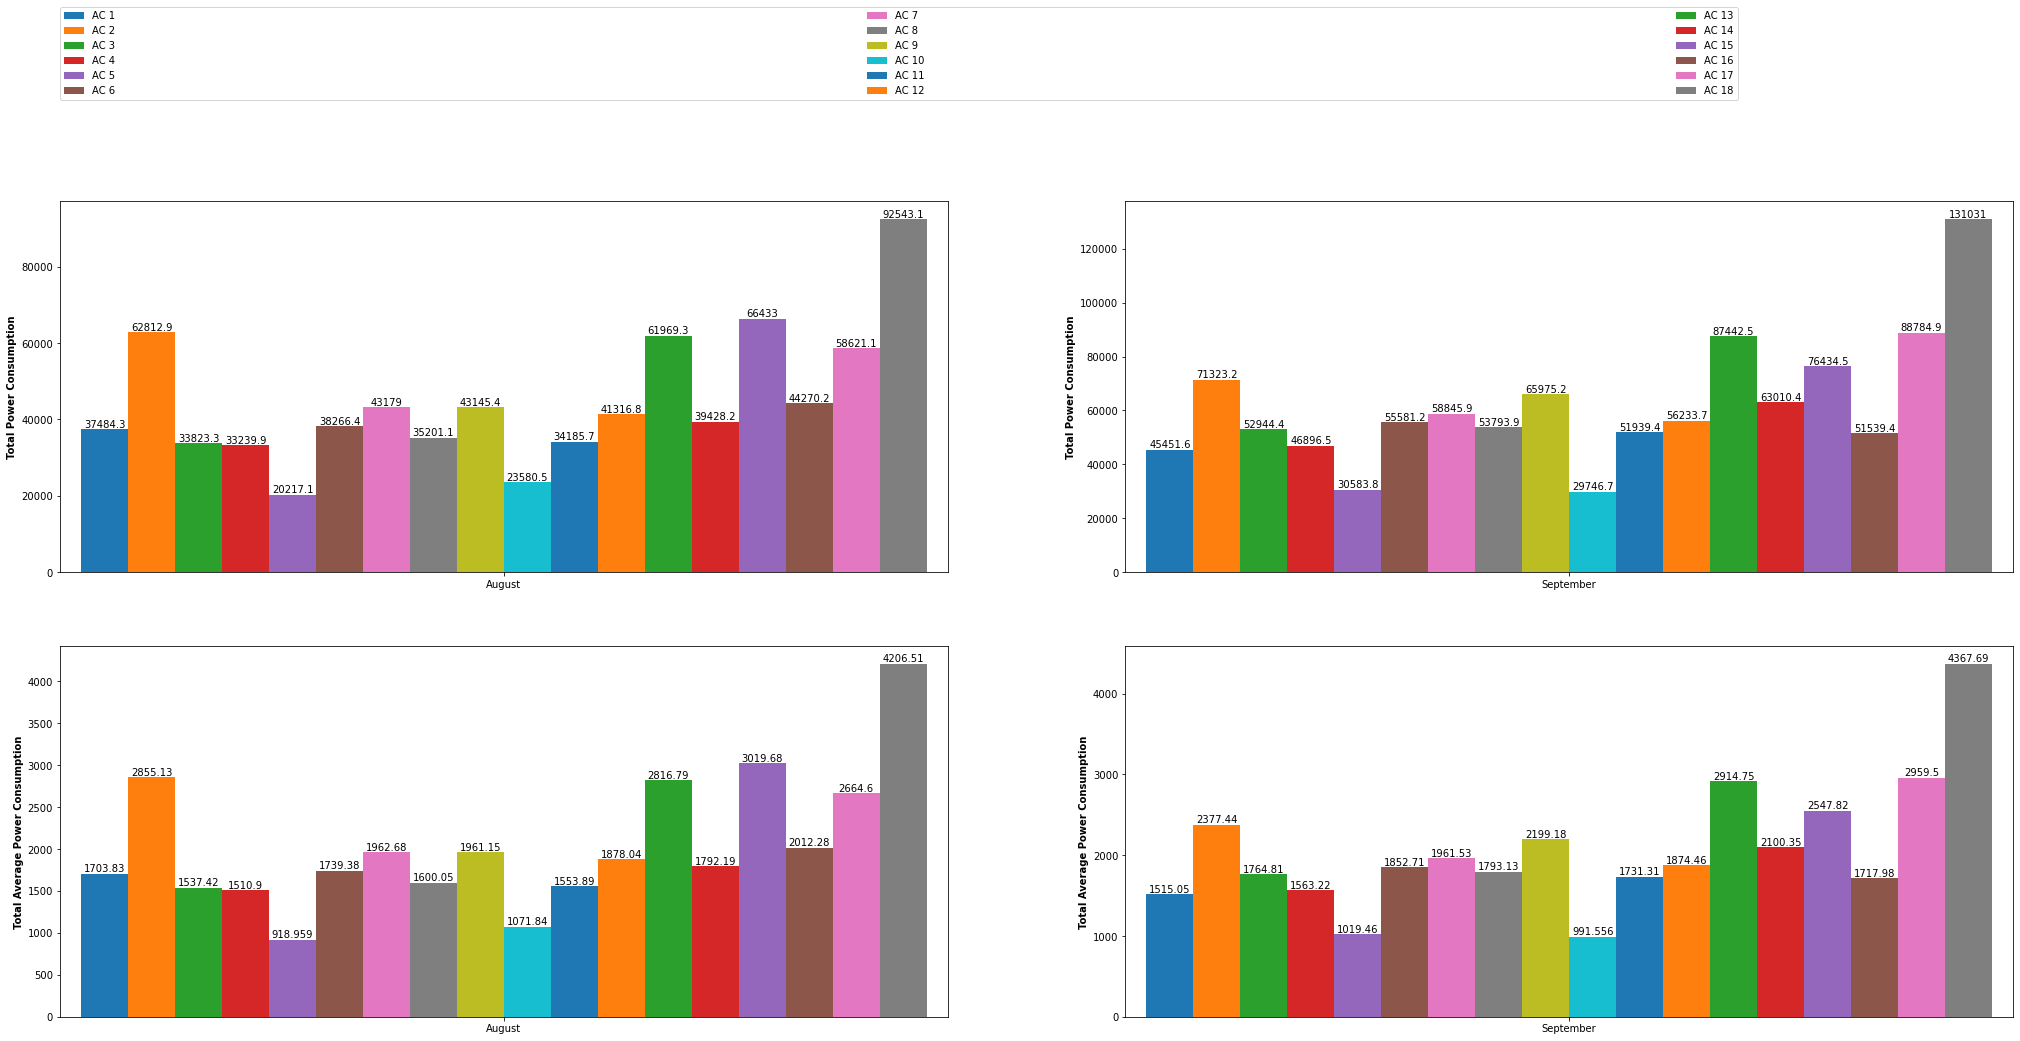

In [16]:
#### Month wise analysis:
cols = daily_AC_Usage.iloc[:,4:-1].columns
month_sum= daily_AC_Usage.groupby("Month",as_index=False)[cols].sum()

month_mean = daily_AC_Usage.groupby("Month",as_index=False)[cols].mean()


fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize = (35,15))

month_sum.iloc[:1,1:].plot.bar(ax= ax1,width = 10)
ax1.set_xticklabels(["August"],rotation = 0)
ax1.set_ylabel("Total Power Consumption",fontweight = "bold")
ax1.legend(bbox_to_anchor=(0,0,1.89,2.80), loc="center right",
                mode="expand", borderaxespad=0, ncol=3)
for container in ax1.containers:
    ax1.bar_label(container)

month_sum.iloc[1:2,1:].plot.bar(ax= ax2,width = 10)
ax2.set_xticklabels(["September"],rotation = 0)
ax2.get_legend().remove()
for container in ax2.containers:
    ax2.bar_label(container)
ax2.set_ylabel("Total Power Consumption",fontweight = "bold")

month_mean.iloc[:1,1:].plot.bar(ax =ax3,width = 10)
ax3.set_xticklabels(["August"],rotation = 0)
ax3.get_legend().remove()
for container in ax3.containers:
    ax3.bar_label(container)
ax3.set_ylabel("Total Average Power Consumption",fontweight = "bold")

month_mean.iloc[1:2,1:].plot.bar(ax =ax4,width = 10)
ax4.set_xticklabels(["September"],rotation = 0)
ax4.get_legend().remove()
for container in ax4.containers:
    ax4.bar_label(container)
ax4.set_ylabel("Total Average Power Consumption",fontweight = "bold")

plt.show()

# Insights: For the month of August, AC 18 had the highest total power consumption(92543.1 Watts) whereas AC5 had the lowest power consumpiton(20217.1 watts).
#           For the month of August , AC 18 on an average consumed 4206.51 units of power whereas AC5 only consumed 919 units of power.
#           For the month of september, AC18 had the highest total power consumption(131031) whereas AC10 had the lowest power consumption(29746.7)
#           For the month of september, AC 18 on an average consumed 4367.69 units of power whereas AC 10 only consumed 991.55 units of power.


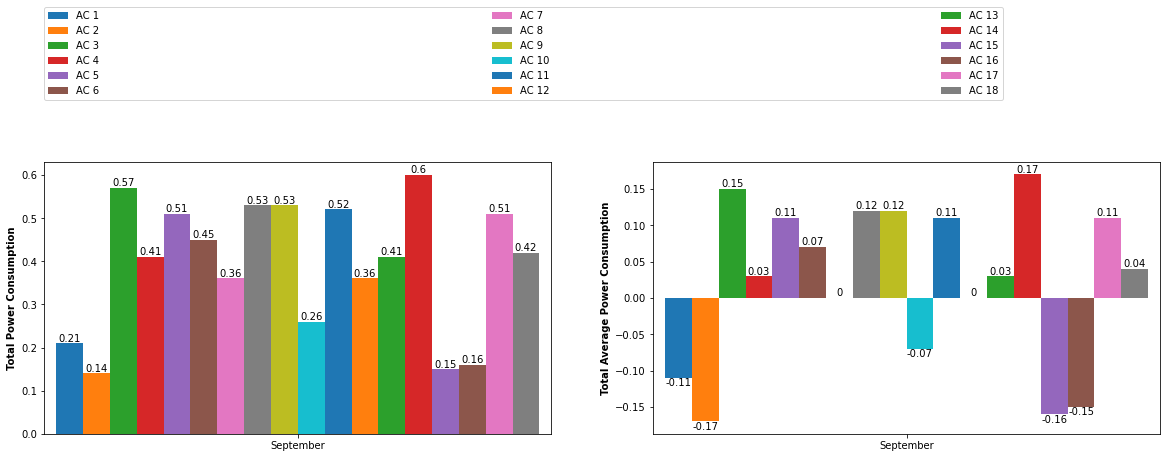

In [17]:
# Percentage change in power consumption from August to September:
pct_sum =round(month_sum.pct_change(),2)
pct_avg = round(month_mean.pct_change(),2)
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (20,5))
pct_sum.iloc[1:,1:].plot.bar(ax = ax1,width=10)
ax1.set_xticklabels(["September"],rotation = 0)
ax1.set_ylabel("Total Power Consumption",fontweight = "bold")
ax1.legend(bbox_to_anchor=(0,0,1.89,2.80), loc="center right",
                mode="expand", borderaxespad=0, ncol=3)
for container in ax1.containers:
    ax1.bar_label(container)

pct_avg.iloc[1:,1:].plot.bar(ax = ax2,width = 10)
ax2.set_xticklabels(["September"],rotation = 0)
ax2.set_ylabel("Total Average Power Consumption",fontweight = "bold")
ax2.get_legend().remove()
for container in ax2.containers:
    ax2.bar_label(container)
plt.show()

# Insights: AC 14 shows the highest percent change(0.6%) in power consumption from August to September. AC 2 shows the least percent change(0.14%) in power consumption.
# AC 2 and AC 14 shows the highest positive and negative average percentage change from August to September (-0.17% and +0.17%). AC 7 and AC 12
# show no change from August to September. 

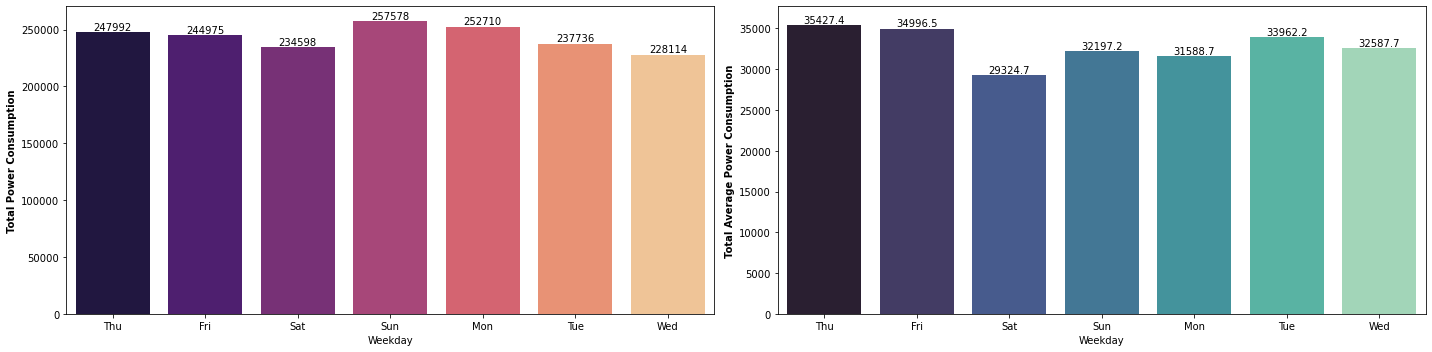

In [18]:
#weekday analysis:
cols = daily_AC_Usage.iloc[:,4:-1].columns
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (20,5))
sns.barplot(x="Weekday",y="Total_Consumption",data = daily_AC_Usage,estimator = np.sum,ax = ax1,palette="magma",ci = False)
ax1.set_ylabel("Total Power Consumption",fontweight = "bold")
for container in ax1.containers:
    ax1.bar_label(container)
sns.barplot(x="Weekday",y = "Total_Consumption",data =daily_AC_Usage,estimator=np.mean,ax = ax2,ci = False,palette = "mako")
ax2.set_ylabel("Total Average Power Consumption",fontweight = "bold")
for container in ax2.containers:
    ax2.bar_label(container)
plt.tight_layout()
plt.show()

#Insights: The total power consumption for all the ACs combined peaks on sundays and is lowest on wednesdays.
#          On an average, the power consumption seems to be high on Thurdays and Fridays, whereas it is lowest on Saturdays.

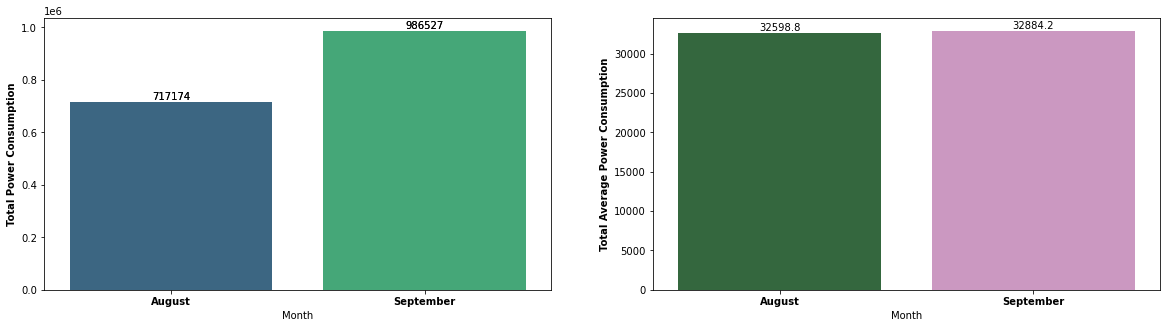

In [19]:
# Total Consumption Analysis:
fig,(ax1,ax2) = plt.subplots(1,2,figsize = (20,5))
daily_AC_Usage.groupby("Month")["Total_Consumption"].sum().plot.bar(ax = ax1)
sns.barplot(x="Month",y="Total_Consumption",data =daily_AC_Usage,ci=False,estimator = np.sum,ax = ax1,palette = "viridis")
ax1.set_xticklabels(["August","September"],fontweight = "bold",rotation = 0)
ax1.set_ylabel("Total Power Consumption",fontweight = "bold")
for container in ax1.containers:
    ax1.bar_label(container)
sns.barplot(x="Month",y="Total_Consumption",data = daily_AC_Usage,estimator=np.mean,ci = False,palette="cubehelix")
ax2.set_xticklabels(["August","September"],fontweight ="bold",rotation = 0)
for container in ax2.containers:
    ax2.bar_label(container)
ax2.set_ylabel("Total Average Power Consumption",fontweight = 'bold')
plt.show()

#Insights: The total power consumption for all the ACs combined for the month of September(986527) is higher than that of August(717174).
#           It is important to note that the power consumption data for the month of August was available for 20 days only.
#            The average power consumption for the month of August and September is almost identical.(approx 33000).

In [20]:
#loading the weather data for the time period available in our dataset.We will merge this dataframe with our original dataframe.
# This additional data was sourced from wunderground and has temperature details for the month of August and September 2019.
weather_data = pd.read_excel("weather_data.xlsx")
weather_data.head()

,Date,Temp_Max,Temp_Avg,Temp_Min,Dew_Max,Dew_Avg,Dew_Min,Humidity_Max,Humidity_Avg,Humidity_Min,Windspeed_Max,Windspeed_Avg,Windspeed_Min,Pressure_Max,Pressure_Avg,Pressure_Min,Total
0,2019-08-01,95,88.5,84,82,78.5,75,94,72.5,59.0,12.0,6.6,3.0,28.8,28.7,28.6,0
1,2019-08-02,91,84.5,81,82,79.5,77,100,84.4,63.0,12.0,3.8,0.0,28.7,28.7,28.6,0
2,2019-08-03,88,83.2,81,84,80.3,79,100,90.0,79.0,14.0,4.2,0.0,28.7,28.7,28.6,0
3,2019-08-04,102,86.0,82,84,81.8,79,94,87.9,53.0,12.0,3.6,0.0,28.7,28.6,28.6,0
4,2019-08-05,95,88.0,82,84,82.0,79,100,83.3,59.0,9.0,4.8,0.0,28.7,28.6,28.6,0


In [21]:
daily_AC_Usage["Date"] = pd.to_datetime(daily_AC_Usage["Date"])

In [22]:
ml_data = daily_AC_Usage.drop(daily_AC_Usage.iloc[:,4:22],axis = 1)

In [23]:
ml_data = ml_data.merge(weather_data,on = "Date",how = "inner")

In [24]:
# we can now drop the date column since we already have all the necessary columns:
ml_data = ml_data.drop("Date",axis=1)
ml_data.head()

,Month,Day,Weekday,Total_Consumption,Temp_Max,Temp_Avg,Temp_Min,Dew_Max,Dew_Avg,Dew_Min,Humidity_Max,Humidity_Avg,Humidity_Min,Windspeed_Max,Windspeed_Avg,Windspeed_Min,Pressure_Max,Pressure_Avg,Pressure_Min,Total
0,8,1,Thu,39394.89,95,88.5,84,82,78.5,75,94,72.5,59.0,12.0,6.6,3.0,28.8,28.7,28.6,0
1,8,2,Fri,36561.10,91,84.5,81,82,79.5,77,100,84.4,63.0,12.0,3.8,0.0,28.7,28.7,28.6,0
2,8,3,Sat,34419.10,88,83.2,81,84,80.3,79,100,90.0,79.0,14.0,4.2,0.0,28.7,28.7,28.6,0
3,8,4,Sun,35248.30,102,86.0,82,84,81.8,79,94,87.9,53.0,12.0,3.6,0.0,28.7,28.6,28.6,0
4,8,5,Mon,34587.22,95,88.0,82,84,82.0,79,100,83.3,59.0,9.0,4.8,0.0,28.7,28.6,28.6,0


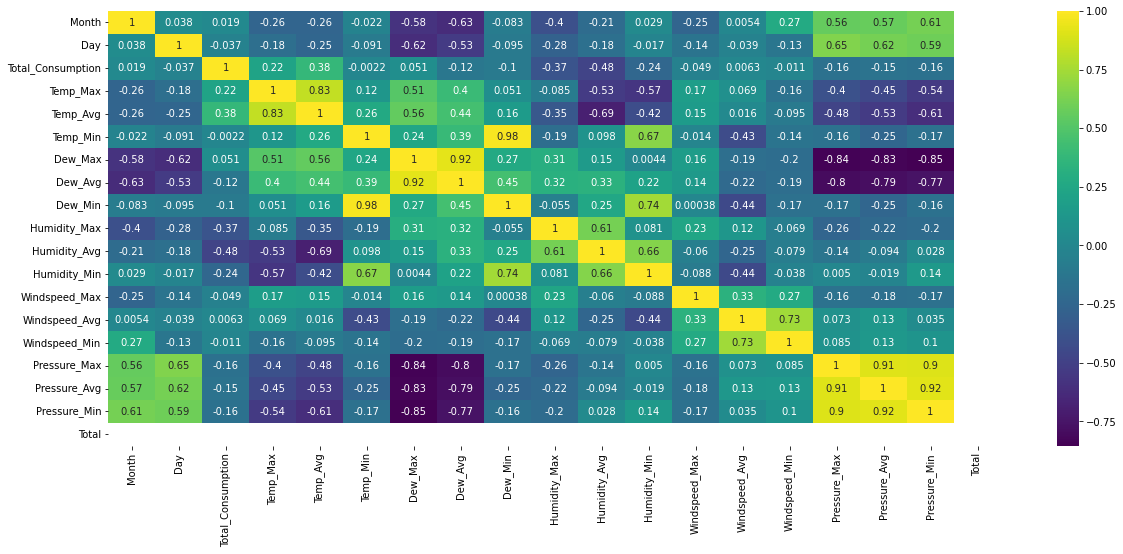

In [25]:
corr = ml_data.corr()
plt.figure(figsize = (20,8))
sns.heatmap(corr,annot= True,cmap = "viridis")
plt.show()

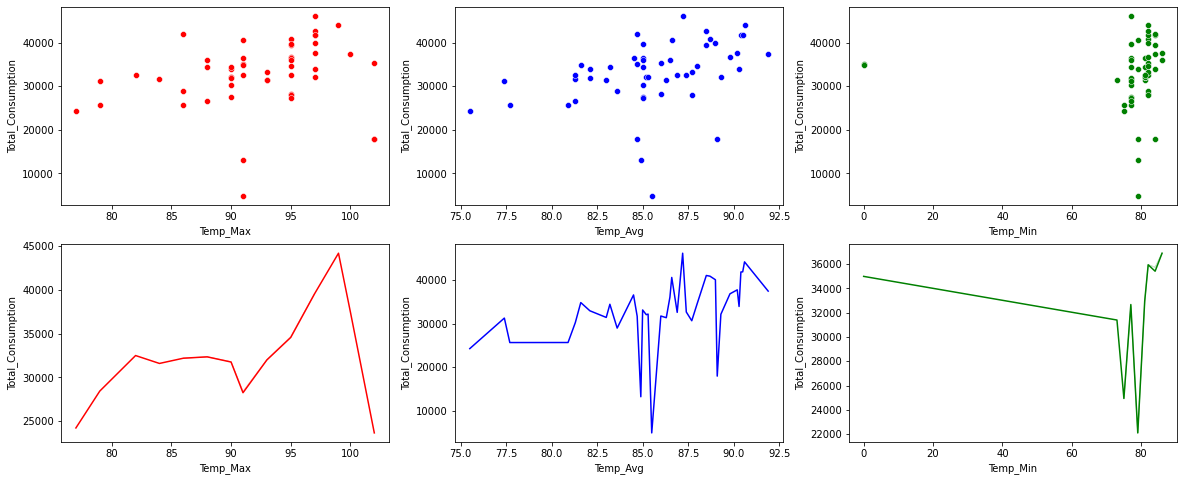

In [26]:
# Consumption analysis based on temperature:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize =(20,8))
sns.scatterplot(x="Temp_Max",y = "Total_Consumption",data = ml_data,ax = ax1,color = "red")
sns.scatterplot(x="Temp_Avg",y = "Total_Consumption",data = ml_data,ax=ax2,color = "blue")
sns.scatterplot(x="Temp_Min",y  ="Total_Consumption",data =ml_data,ax= ax3,color = "green")
sns.lineplot(x = "Temp_Max",y = "Total_Consumption",data = ml_data,ax =ax4,ci = False,color = "r")
sns.lineplot(x = "Temp_Avg",y = "Total_Consumption",data =ml_data,ax = ax5,ci = False,color = "b")
sns.lineplot(x = "Temp_Min",y = "Total_Consumption",data = ml_data,ax = ax6,ci =False,color = "g")
plt.show()

# Insights: As expected when the temperature rises the power consumption also rises.

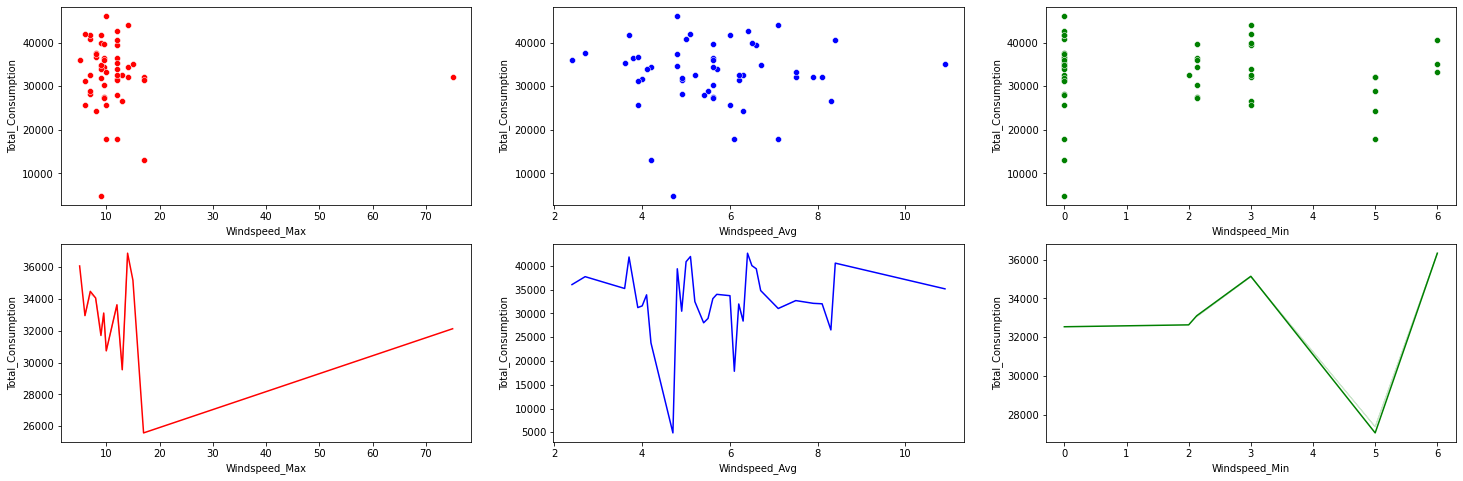

In [27]:
# Consumption Analysis based on humidity:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize =(25,8))
sns.scatterplot(x="Windspeed_Max",y = "Total_Consumption",data = ml_data,ax = ax1,color = "r")
sns.scatterplot(x="Windspeed_Avg",y = "Total_Consumption",data = ml_data,ax=ax2,color = "b")
sns.scatterplot(x="Windspeed_Min",y  ="Total_Consumption",data =ml_data,ax= ax3,color = "g")

sns.lineplot(x="Windspeed_Max",y = "Total_Consumption",data = ml_data,ax = ax4,ci = False,color= "r")
sns.lineplot(x="Windspeed_Avg",y = "Total_Consumption",data = ml_data,ax=ax5,ci = False,color = "b")
sns.lineplot(x="Windspeed_Min",y  ="Total_Consumption",data =ml_data,ax= ax6,ci = False,color = "g")
plt.show()

#Insights: The windspeed generally has very little impact on power consumption. 

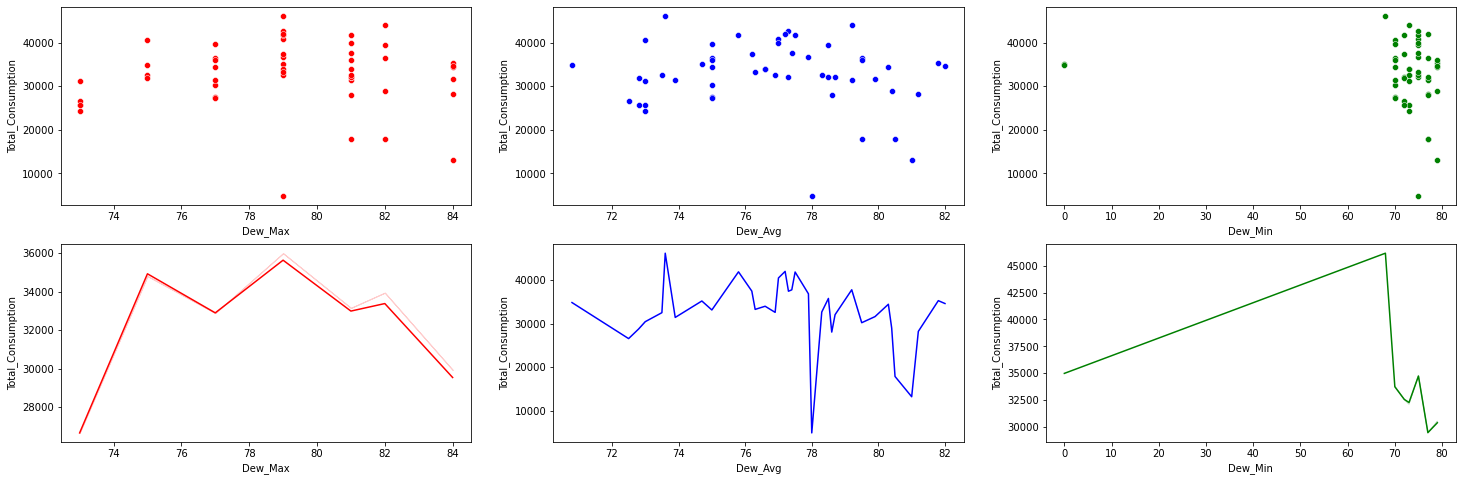

In [28]:
# Consumption Analysis based on dew factor:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize =(25,8))
sns.scatterplot(x="Dew_Max",y = "Total_Consumption",data = ml_data,ax = ax1,color = "r")
sns.scatterplot(x="Dew_Avg",y = "Total_Consumption",data = ml_data,ax=ax2,color= "b")
sns.scatterplot(x="Dew_Min",y  ="Total_Consumption",data =ml_data,ax= ax3,color = "g")

sns.lineplot(x="Dew_Max",y = "Total_Consumption",data = ml_data,ax = ax4,ci = False,color ="r")
sns.lineplot(x="Dew_Avg",y = "Total_Consumption",data = ml_data,ax=ax5,ci = False,color ="b")
sns.lineplot(x="Dew_Min",y  ="Total_Consumption",data =ml_data,ax= ax6,ci = False,color ="g")
plt.show()

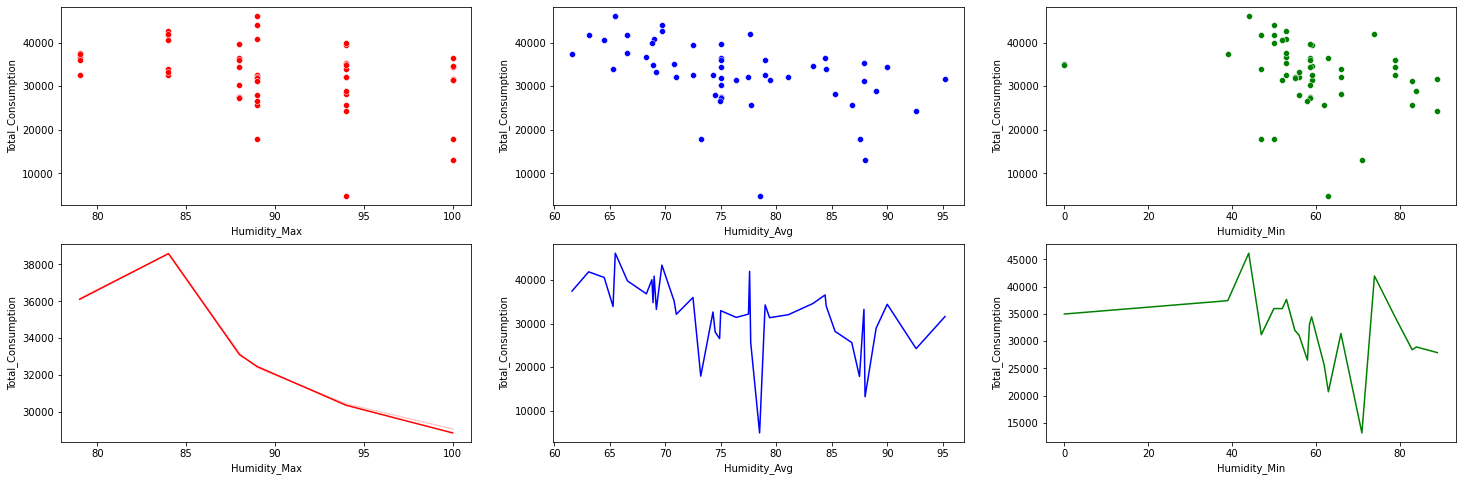

In [29]:
# Consumption analysis based on windspeed:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize =(25,8))
sns.scatterplot(x="Humidity_Max",y = "Total_Consumption",data = ml_data,ax = ax1,color="r")
sns.scatterplot(x="Humidity_Avg",y = "Total_Consumption",data = ml_data,ax=ax2,color ="b")
sns.scatterplot(x="Humidity_Min",y  ="Total_Consumption",data =ml_data,ax= ax3,color ="g")

sns.lineplot(x="Humidity_Max",y = "Total_Consumption",data = ml_data,ax = ax4,ci = False,color="r")
sns.lineplot(x="Humidity_Avg",y = "Total_Consumption",data = ml_data,ax=ax5,ci = False,color="b")
sns.lineplot(x="Humidity_Min",y  ="Total_Consumption",data =ml_data,ax= ax6,ci = False,color="g")
plt.show()

#Insights: THe power consumption seems to decline as average humidity increases.It could be because as humidity increases the chances
# of precipitation also increases and thus users dont feel the need to use ACs.

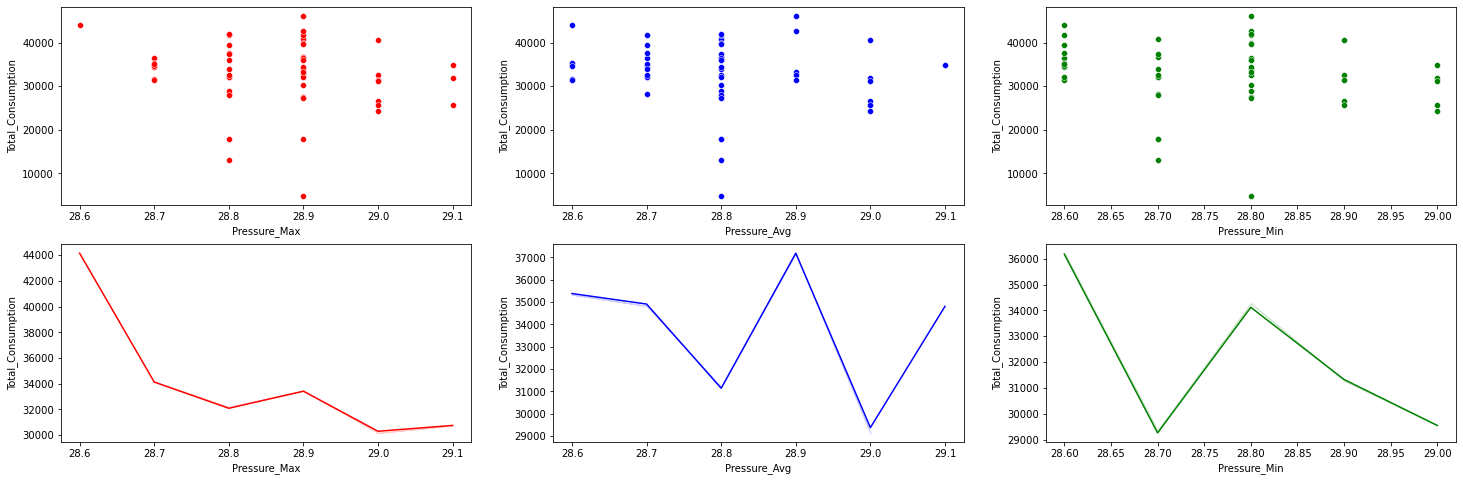

In [30]:
# Consumption analysis based on pressure factor:
fig,((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize =(25,8))
sns.scatterplot(x="Pressure_Max",y = "Total_Consumption",data = ml_data,ax = ax1,color="r")
sns.scatterplot(x="Pressure_Avg",y = "Total_Consumption",data = ml_data,ax=ax2,color="b")
sns.scatterplot(x="Pressure_Min",y  ="Total_Consumption",data =ml_data,ax= ax3,color="g")

sns.lineplot(x="Pressure_Max",y = "Total_Consumption",data = ml_data,ax = ax4,ci = False,color="r")
sns.lineplot(x="Pressure_Avg",y = "Total_Consumption",data = ml_data,ax=ax5,ci = False,color="b")
sns.lineplot(x="Pressure_Min",y  ="Total_Consumption",data =ml_data,ax= ax6,ci = False,color="g")
plt.show()

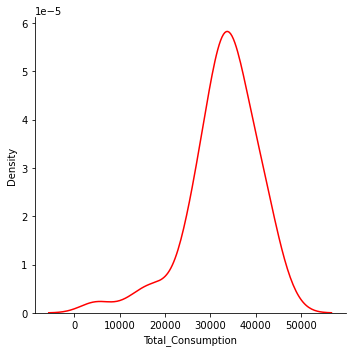

In [31]:
#Checking how our total consumption is distributed:
sns.displot(x="Total_Consumption",data= ml_data,kind='kde',color = "red")
#It seems that our dependent variable is negatively skewed.

count       52.000000
mean     32763.491154
std       7696.622803
min       4865.670000
1%        9103.759800
5%       17877.130500
10%      25625.515000
25%      29909.547500
50%      33577.105000
75%      36973.960000
90%      41735.022000
95%      42286.328000
99%      45134.251800
max      46149.060000
Name: Total_Consumption, dtype: float64


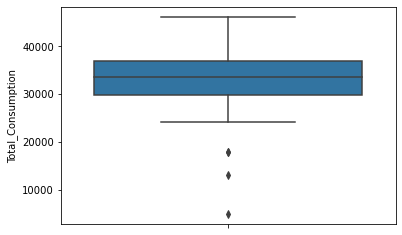

In [32]:
#Total comsumption Boxplot:
sns.boxplot(y = "Total_Consumption",data = ml_data)
print(ml_data["Total_Consumption"].describe(percentiles =[0.01,0.05,0.10,0.25,0.50,0.75,0.90,0.95,0.99]))
# insights: The median total_power consumption is around 34000 units.